In [1]:
from _3D_LungSegmentation_Threshold import get_segmented_lungs
from _3D_CT_Preprocess import preprocessScan
from _3D_CT_Preprocess import getScan
from _3D_CT_Preprocess import normalizeScan
from _3D_CT_Preprocess import resizeScan
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt
from scipy import ndimage
import os
import matplotlib.pyplot as plt

In [2]:
CovidScan=[]
Label=[]

In [3]:
CovidScan_Path_0 = "/Users/phoenixji/Desktop/LungData/MosMedData/CT-1/"
CovidScan_Path_1 = "/Users/phoenixji/Desktop/LungData/MosMedData/CT-2/"
CovidScan_Path_2 = "/Users/phoenixji/Desktop/LungData/MosMedData/CT-3/"
CovidScan_List_0 = os.listdir(CovidScan_Path_0)
CovidScan_List_1 = os.listdir(CovidScan_Path_1)
CovidScan_List_2 = os.listdir(CovidScan_Path_2)

In [4]:
len(CovidScan_List_0),len(CovidScan_List_1),len(CovidScan_List_2)

(684, 125, 47)

In [5]:
# For First Positive Class label:0
CovidScan_List_0 = CovidScan_List_0
for Scan_ in CovidScan_List_0:
    
    
    scan = preprocessScan(CovidScan_Path_0+Scan_,(128,128,64))
    scan = np.expand_dims(scan,axis=-1)
    #print("After Resize"+str(scan.shape))
 
    CovidScan.append(scan)
    Label.append(0)

In [6]:
len(CovidScan),len(Label),CovidScan[0].shape

(684, 684, (128, 128, 64, 1))

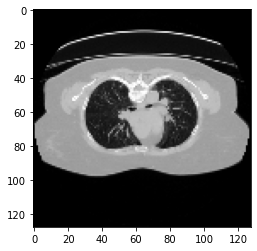

In [7]:
plt.imshow(CovidScan[0][:,:,39],cmap='gray')

In [8]:
# For Second Positive Class label:1

#for i in range(5):

for Scan_ in CovidScan_List_1:


    scan = preprocessScan(CovidScan_Path_1+Scan_,(128,128,64))
    scan = np.expand_dims(scan,axis=-1)
    #print("After Resize"+str(scan.shape))

    CovidScan.append(scan)
    Label.append(1)

In [9]:
len(CovidScan),len(Label),CovidScan[0].shape

(809, 809, (128, 128, 64, 1))

In [10]:
# For Third Positive Class label:2

#for i in range(14):
for Scan_ in CovidScan_List_2:


    scan = preprocessScan(CovidScan_Path_2+Scan_,(128,128,64))
    scan = np.expand_dims(scan,axis=-1)
    #print("After Resize"+str(scan.shape))

    CovidScan.append(scan)
    Label.append(2)

In [11]:
len(CovidScan),len(Label),CovidScan[0].shape

(856, 856, (128, 128, 64, 1))

In [12]:
# np.save('X_3D_DirectOver_3Class_1',np.array(CovidScan[:1000]))
# np.save('y_3D_DirectOver_3Class_1',np.array(Label[:1000]))

In [13]:
# np.save('X_3D_DirectOver_3Class_2',np.array(CovidScan[1000:]))
# np.save('y_3D_DirectOver_3Class_2',np.array(Label[1000:]))

In [14]:
np.save('X_3D_Direct_3Class',np.array(CovidScan))
np.save('y_3D_Direct_3Class',np.array(Label))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(CovidScan), np.array(Label), 
                                                    test_size = 0.2, random_state = 0,shuffle=True)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

In [ ]:
np.save('X_train_3D_Direct_3Class',X_train)
np.save('y_train_3D_Direct_3Class',y_train)
np.save('X_test_3D_Direct_3Class',X_test)
np.save('y_test_3D_Direct_3Class',y_test)